In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/raw_data.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


But we can see in the 'Smoking History' feature, there is 'No Info' which means it is a null value.

In [ ]:
no_info_count = df['smoking_history'].eq('No Info').sum()
print("Count of 'No info' in Smoking history:", no_info_count)

Count of 'No info' in Smoking history: 35816


In [ ]:
# Assuming 'Gender' contains 'Male' and 'Female' categories
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df['smoking_history'].replace('No Info', 'Unknown', inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the 'smoking_history' column
smoking_encoded = encoder.fit_transform(df[['smoking_history']])

# Get the categories from the encoder
categories = encoder.categories_[0]

# Create new column names for the one-hot encoded columns
smoking_categories = [f'smoking_history_{category}' for category in categories]

# Create a DataFrame with the one-hot encoded columns
smoking_encoded_df = pd.DataFrame(smoking_encoded, columns=smoking_categories)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, smoking_encoded_df], axis=1)

# Drop the original 'smoking_history' column
df.drop(['smoking_history'], axis=1, inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_Unknown,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,36.0,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,66.0,0,0,27.83,5.7,155,0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1.0,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,1.0,0.0


# Visualisation

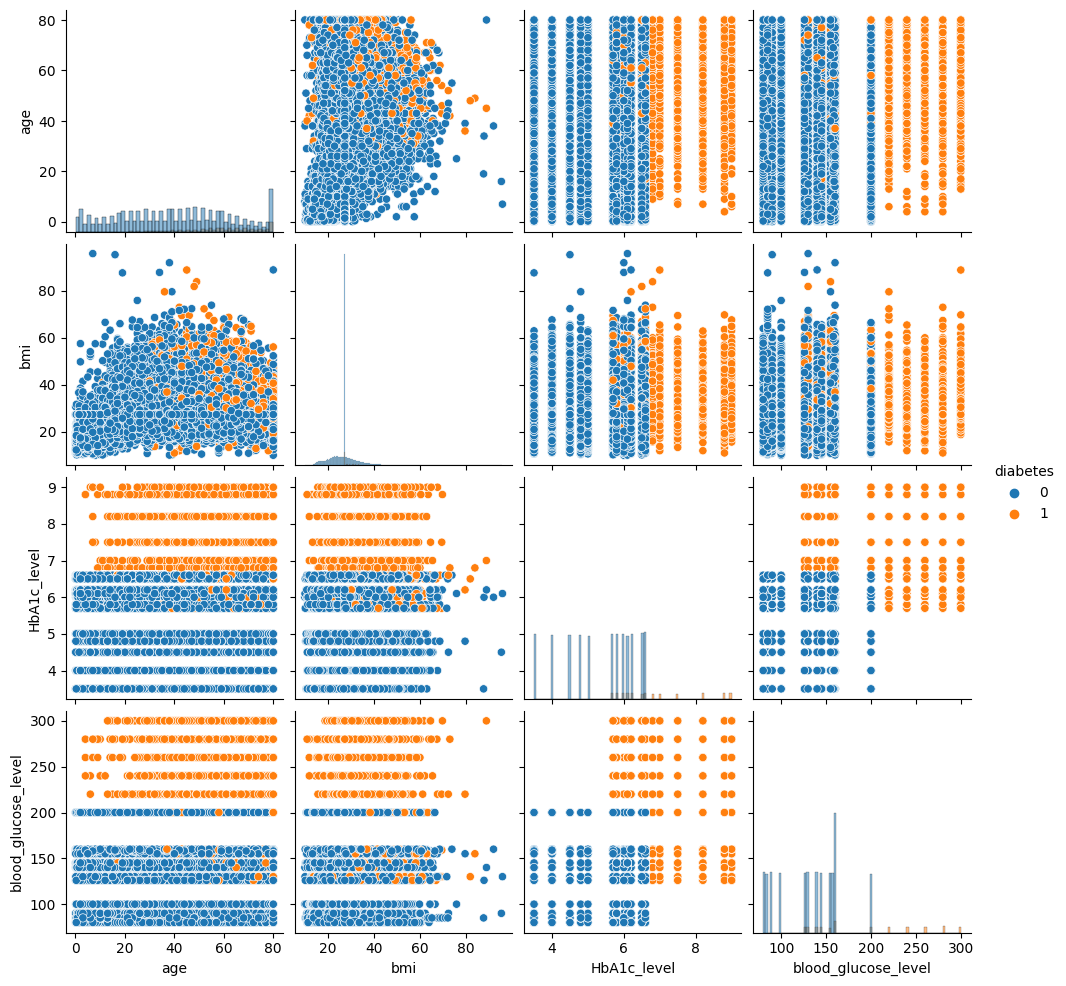

In [ ]:
# Select numeric columns
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Add 'diabetes' to the selected columns
selected_columns = numeric_columns + ['diabetes']

# Create a pairplot
sns.pairplot(df[selected_columns], hue='diabetes', diag_kind='hist')
plt.show()


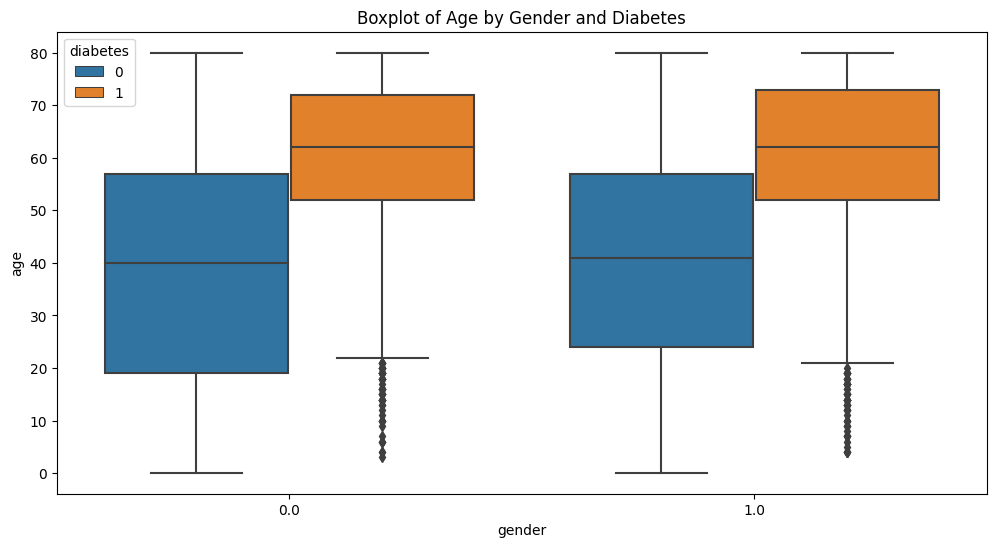

In [ ]:
# Create boxplots for 'gender' and 'smoking_history' with 'diabetes' as the hue
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='age', data=df, hue='diabetes')
plt.title('Boxplot of Age by Gender and Diabetes')
plt.show()

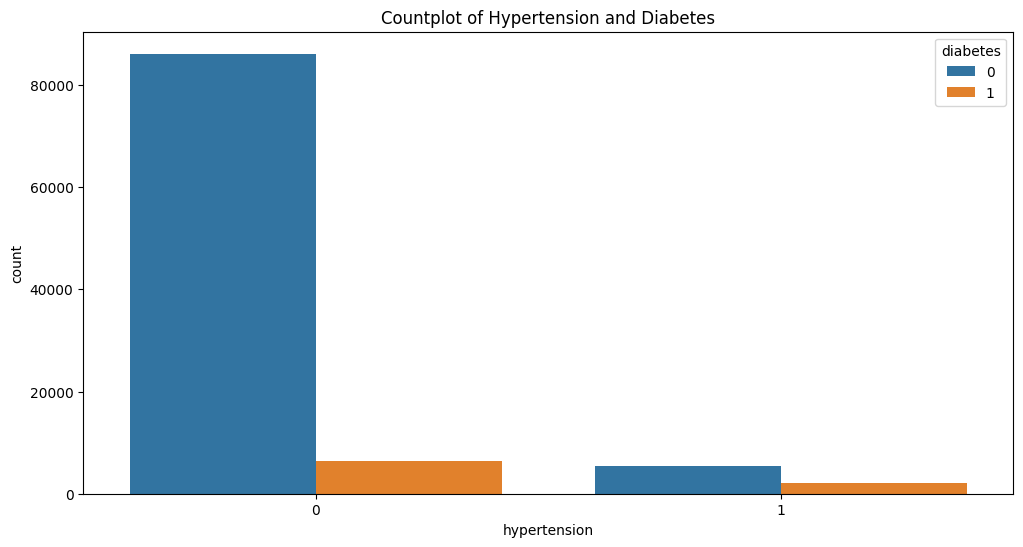

In [ ]:
# Create countplots for binary features
plt.figure(figsize=(12, 6))
sns.countplot(x='hypertension', data=df, hue='diabetes')
plt.title('Countplot of Hypertension and Diabetes')
plt.show()

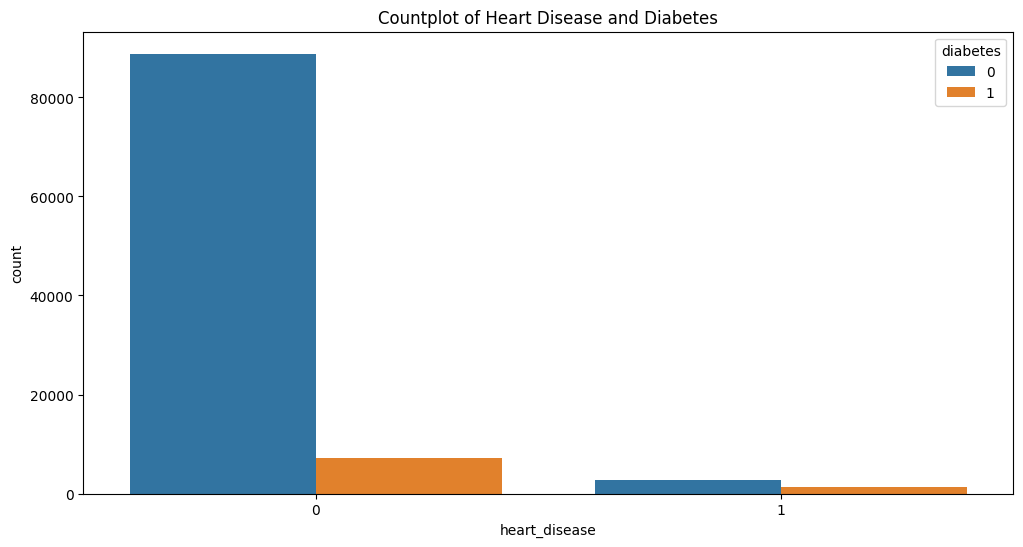

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='heart_disease', data=df, hue='diabetes')
plt.title('Countplot of Heart Disease and Diabetes')
plt.show()

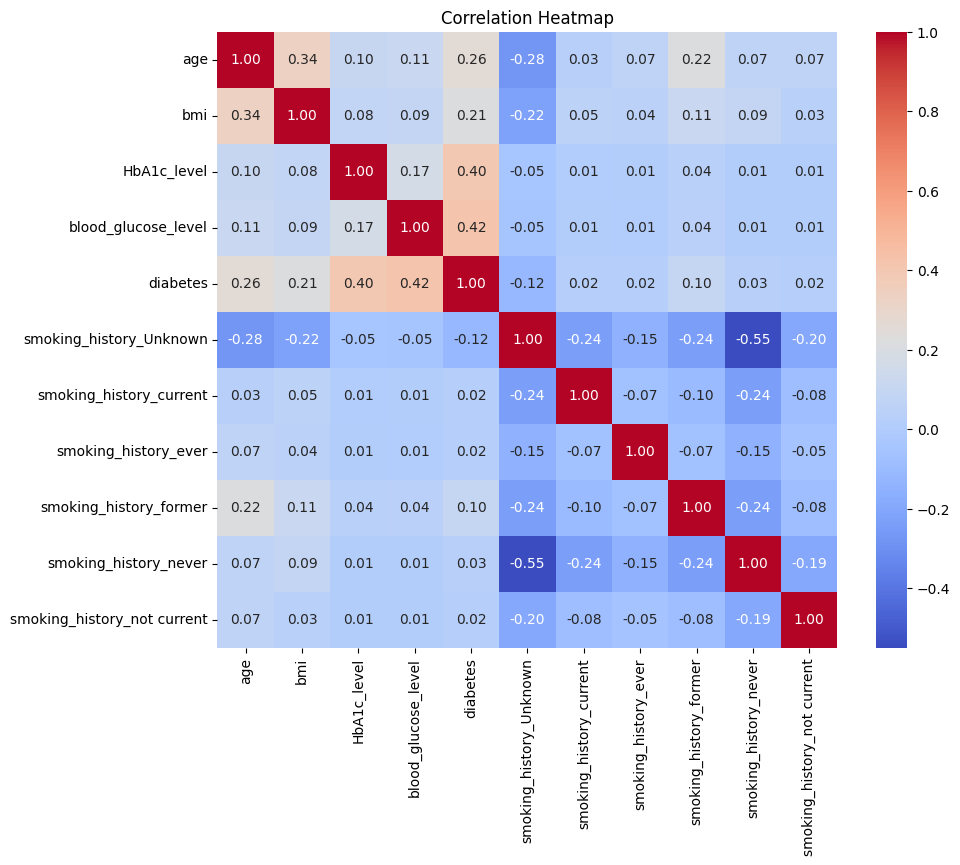

In [ ]:
# Select the features you want to include in the heatmap
selected_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'smoking_history_Unknown', 'smoking_history_current', 'smoking_history_ever','smoking_history_former','smoking_history_never','smoking_history_not current']

# Create a correlation matrix
correlation_matrix = df[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

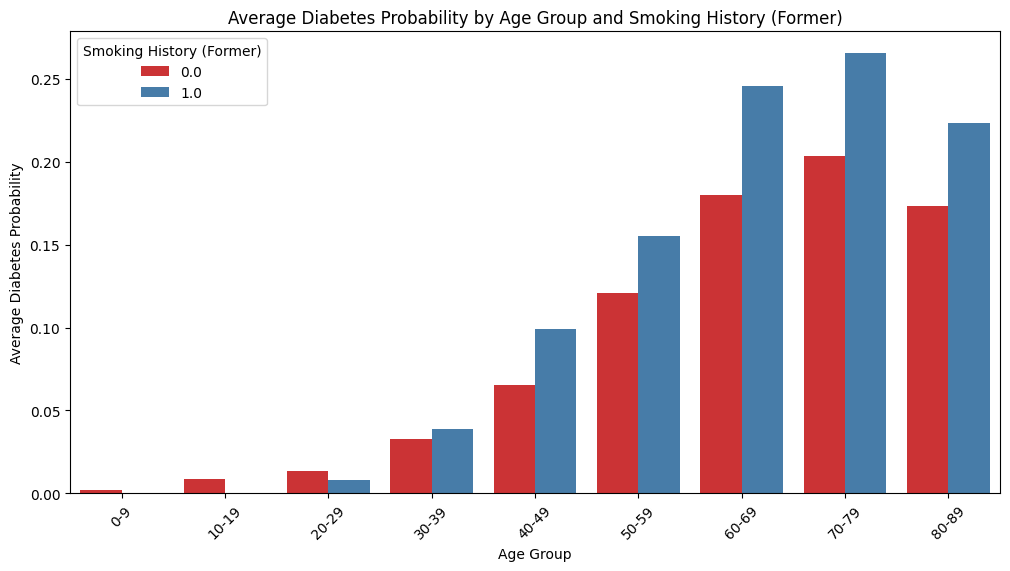

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define age intervals (bins)
age_bins = list(range(0, 100, 10))

# Create age groups and add them as a new column
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False, labels=[f'{i}-{i+9}' for i in range(0, 90, 10)])

# Group the data by 'age_group' and 'smoking_history_former' and calculate the mean diabetes probability
grouped_data = df.groupby(['age_group', 'smoking_history_former'])['diabetes'].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='diabetes', hue='smoking_history_former', data=grouped_data, palette='Set1')
plt.title('Average Diabetes Probability by Age Group and Smoking History (Former)')
plt.xlabel('Age Group')
plt.ylabel('Average Diabetes Probability')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Smoking History (Former)', loc='upper left')
plt.show()

# Remove the 'age_group' column to avoid affecting the original DataFrame
df.drop(['age_group'], axis=1, inplace=True)



# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features (e.g., 'Age', 'bmi', 'HbA1c level', 'blood_glucose_level')
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [ ]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_Unknown,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,1.692704,0,1,-0.321056,1.001706,0.047704,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.538006,0,0,-0.000116,1.001706,-1.426210,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.616691,0,0,-0.000116,0.161108,0.489878,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.261399,0,0,-0.583232,-0.492690,0.416183,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.515058,1,1,-1.081970,-0.679490,0.416183,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1.692704,0,0,-0.000116,0.628107,-1.180558,0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,-1.771388,0,0,-1.499343,0.908306,-0.934905,0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,1.070944,0,0,0.076729,0.161108,0.416183,0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1.0,-0.794336,0,0,1.220361,-1.426688,-0.934905,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Assuming you have your DataFrame df ready
df.to_csv('/content/processed_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop(['diabetes'], axis=1)  # Features excluding 'diabetes'
y = df['diabetes']  # Target variable

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (70000, 13)
Validation set shape: (15000, 13)
Testing set shape: (15000, 13)


# Hist Gradient Boosting Classifier

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental module
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split your data into training and validation sets (as you did before)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a HistGradientBoostingClassifier
classifier = HistGradientBoostingClassifier(random_state=42)

# Train the classifier on the training data (which may contain missing values)
classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = classifier.predict(X_val)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Accuracy:", accuracy)
print("Validation F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Validation Accuracy: 0.9724
Validation F1 Score: 0.809655172413793


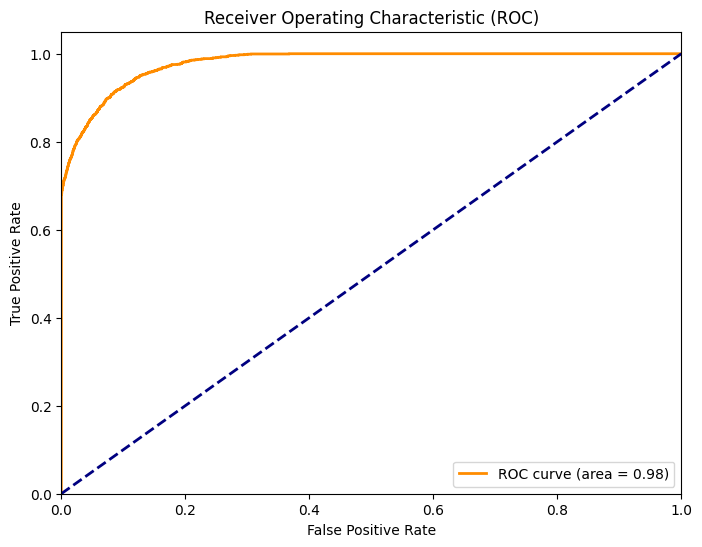

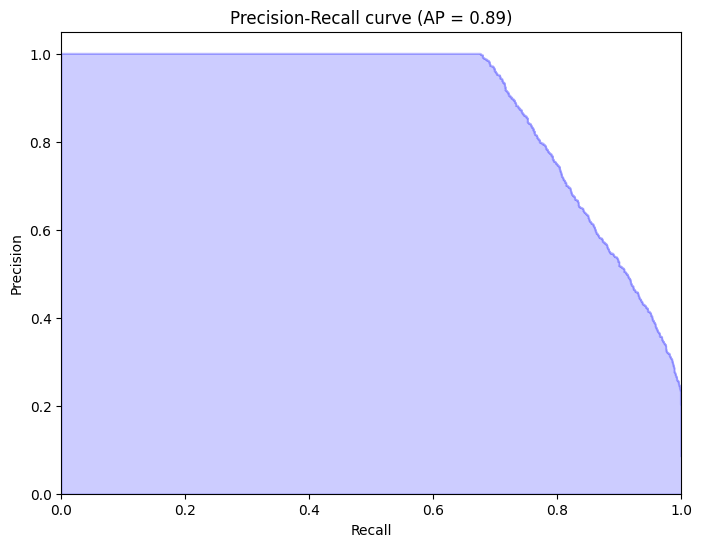

ROC AUC: 0.9790824817647212
Average Precision (AP): 0.8873103791910767


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming you have already trained your HistGradientBoostingClassifier and obtained predicted probabilities on the validation set
y_val_proba = classifier.predict_proba(X_val)[:, 1]  # Predicted probabilities for class 1 (diabetes)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, y_val_proba)

# Calculate Average Precision (AP)
average_precision = average_precision_score(y_val, y_val_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.show()

# Print ROC AUC and Average Precision
print("ROC AUC:", roc_auc)
print("Average Precision (AP):", average_precision)